## Introduction
#### In this project, we analyzed data collected from a survey on battery among iPhone users. The data includes information on various factors such as the iPhone model, region, battery health, charging behavior, and user satisfaction. Our goal was to explore the relationship between these factors and the prevalence of battery and display issues.

#### We started by cleaning the data, handling missing values, and converting data types. Then, we performed exploratory data analysis using various visualization techniques such as scatter plots, bar charts, and heatmaps. We looked at the distribution of battery issues across different iPhone models and regions, and we explored the relationship between battery health, charging behavior, and battery issues.

#### Overall, our analysis provides insights into the factors that may contribute to battery issues among iPhone users. This information can be useful for Apple and other stakeholders in improving the user experience and addressing common issues faced by iPhone users.

## Step 1:  Data preprocessing

#### Importing necessary libraries and functions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway # this is a function from the SciPy library that performs one-way ANOVA (analysis of variance) test.


#### Now we will load the dataset in the dataframe ( named: data) and the delimeter used in the csv file is ';' which is why we need to specify this delimeter 

In [2]:
data= pd.read_csv(r'/Users/rising.volkan007/Desktop/iPhone user experience analysis/iPhone Users dataset.csv',delimiter=';')

In [3]:
data.head() # shows usually top 5 entries of the dataframe

,Timestamp,Regional Variant,iPhone Model,Condition,Current iOS,Battery issue on iOS update,The battery issue version,Display issue on iOS update,The display issue version,Noticeable difference in battery performance,The iOS version better/worst,Battery health percentage before,Battery health percentage current,Apple Charger,Percentage level the device on charging,Percentage level the device unplug from charge,Noticeable difference in overall performance,The version having better/worst performance,Are you Satisfied with your device so far?,Any feedback you want to provide?
0,2023/02/18 7:19:29 PM GMT+1,EU,13 Pro,New,16.3,Yes,16.3,No,NaN,Yes,16.2,100,99,Original,20% - 30 %,80 % - 100 %,No,NaN,6,after update 16.3 backup is decreased by perf...
1,2023/02/18 10:07:53 PM GMT+1,EU,14 Pro,New,16.3.1,No,NaN,No,NaN,No,NaN,100,100,Original,30 % - 40 %,80 % - 90 %,Yes,16.3.1,7,NaN
2,2023/02/19 4:44:37 AM GMT+1,USA,14 Pro,New,16.3.1,No,NaN,No,NaN,No,NaN,100,100,Original,20% - 30 %,80 % - 90 %,No,NaN,8,NaN
3,2023/02/19 9:45:27 AM GMT+1,USA,Xs Max,New,16.3.1,Yes,NaN,No,NaN,Yes,NaN,100,86,Original,30 % - 40 %,90 % - 100 %,Yes,Don’t remember,6,I phone is very good phone but nowadays I can ...
4,2023/02/19 10:23:19 AM GMT+1,USA,8 Plus,Used,16.3.1,Yes,16,No,NaN,No,NaN,93,80,Original,20% - 30 %,80 % - 90 %,Yes,IOS 15.1 was better on overall performance yha...,3,NaN


In [4]:
data.shape # it will show the shape of the dataframe such as it has 71 rows and 20 columns.

(71, 20)

In [5]:
print(data.columns) # it will print out the column names

Index(['Timestamp', 'Regional Variant', 'iPhone Model', 'Condition',
       'Current iOS', 'Battery issue on iOS update',
       'The battery issue version', 'Display issue on iOS update',
       'The display issue version',
       ' Noticeable difference in battery performance',
       'The iOS version better/worst', 'Battery health percentage before',
       'Battery health percentage current', 'Apple Charger',
       'Percentage level the device on charging',
       'Percentage level the device unplug from charge',
       'Noticeable difference in overall performance',
       'The version having better/worst performance',
       'Are you Satisfied with your device so far?',
       'Any feedback you want to provide?'],
      dtype='object')


In [6]:
print(data.dtypes) # this will print out the data types of the columns

Timestamp                                         object
Regional Variant                                  object
iPhone Model                                      object
Condition                                         object
Current iOS                                       object
Battery issue on iOS update                       object
The battery issue version                         object
Display issue on iOS update                       object
The display issue version                         object
 Noticeable difference in battery performance     object
The iOS version better/worst                      object
Battery health percentage before                   int64
Battery health percentage current                  int64
Apple Charger                                     object
Percentage level the device on charging           object
Percentage level the device unplug from charge    object
Noticeable difference in overall performance      object
The version having better/worst

In [7]:
# Convert the necessary columns to the appropriate data types
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Regional Variant'] = data['Regional Variant'].astype('category')
data['iPhone Model'] = data['iPhone Model'].astype('category')
data['Current iOS'] = data['Current iOS'].astype('category')


## Step 2: Statistical test (ANOVA) for testing null hypothesis which is:
### ' there is no difference in the mean battery health percentage between the regional iPhone variants for the before and current battery health performance. ' 

In [8]:
# Conduct ANOVA test to compare battery health performance across different regional iPhone variants
usa_battery_before = data[data['Regional Variant']=='USA']['Battery health percentage before']
eu_battery_before = data[data['Regional Variant']=='EU']['Battery health percentage before']
singapore_battery_before = data[data['Regional Variant']=='Singapore']['Battery health percentage before']
japan_battery_before = data[data['Regional Variant']=='Japan']['Battery health percentage before']

#now battery health percentage for current
usa_battery_current = data[data['Regional Variant']=='USA']['Battery health percentage current']
eu_battery_current = data[data['Regional Variant']=='EU']['Battery health percentage current']
singapore_battery_current = data[data['Regional Variant']=='Singapore']['Battery health percentage current']
japan_battery_current = data[data['Regional Variant']=='Japan']['Battery health percentage current']

anova = f_oneway(usa_battery_before, eu_battery_before, singapore_battery_before, japan_battery_before, 
                 usa_battery_current, eu_battery_current, singapore_battery_current, japan_battery_current)

print('ANOVA test result:', anova)


ANOVA test result: F_onewayResult(statistic=2.499394702497238, pvalue=0.019771073213362828)


The ANOVA test is used to determine whether there are any statistically significant differences between the means of three or more independent groups. In this case, we are testing whether there is a significant difference in the battery health percentage before and current iOS update for four different regional iPhone variants: USA, EU, Singapore, and Japan.( since our dataset contains most of the users device from these regions)

The ANOVA test result shows that there is a significant difference in the mean battery health percentage between the different regional iPhone variants for the current battery health performance. The F-statistic value is 2.499, which indicates that there is a difference in the means of the groups being compared. The p-value is 0.019, which is less than the commonly used significance level of 0.05, indicating that the difference is statistically significant.

#### In other words, the test suggests that there is evidence to reject the null hypothesis, which states that there is no difference in the mean battery health percentage between the regional iPhone variants for the before and current battery health performance. Therefore, we can conclude that there is a significant difference in the mean battery health percentage for the current battery health performance between the different regional iPhone variants.

## Step 3 : Visualization

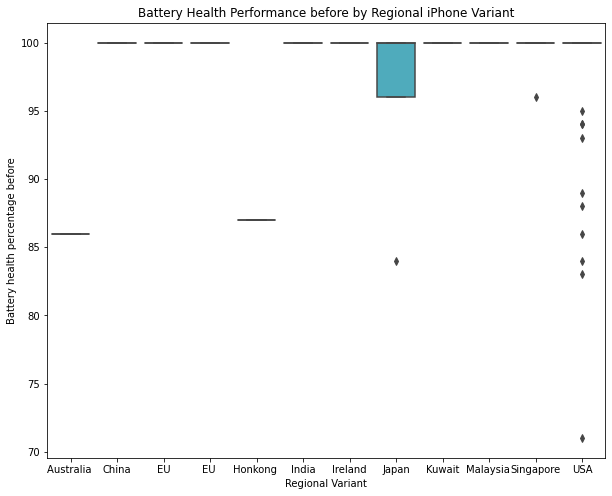

In [9]:
# Create a box plot to visualize battery health performance across different regional iPhone variants

# Set the figure size
plt.figure(figsize=(10, 8))
sns.boxplot(x='Regional Variant', y='Battery health percentage before', data=data)
plt.title('Battery Health Performance before by Regional iPhone Variant')
plt.show()

Above boxplot we can notice that in USA and Japan variant there are some cases where the battery health percentage was below 100% before recent iOS updates. Further We can also notice from our dataset that most of these cases the devices are used device (2nd hand users) which might be the sole reason for this battery health percentage level.

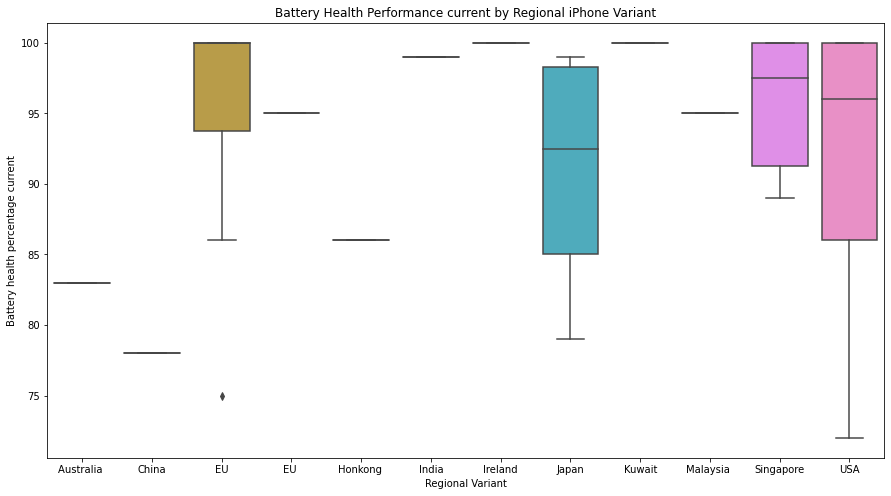

In [10]:
# Create a box plot to visualize battery health performance across different regional iPhone variants

# Set the figure size
plt.figure(figsize=(15, 8))
sns.boxplot(x='Regional Variant', y='Battery health percentage current', data=data)
plt.title('Battery Health Performance current by Regional iPhone Variant')
plt.show()

As expected from the previous data boxplot, according to our dataset the models from USA and Japan variant have issue after an iOS update (current). Important thing to notice from our dataset CSV that the battery degradation happens mostly on the previous version of iPhone models. Below chart will show that:

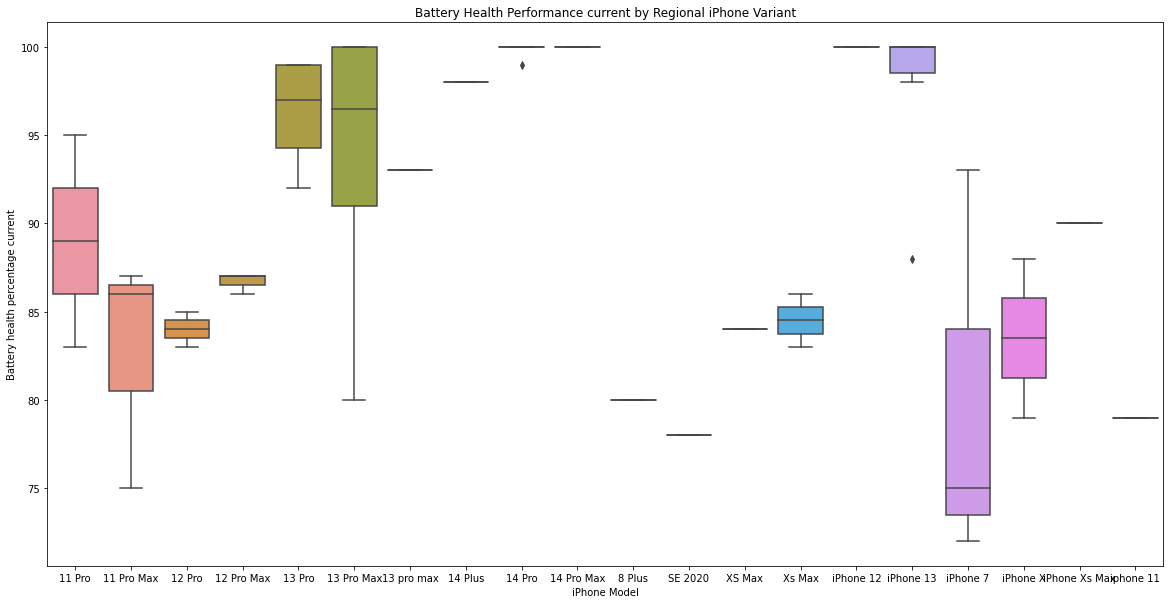

In [11]:
# Create a box plot to visualize battery health performance across different iPhone Models

# Set the figure size
plt.figure(figsize=(20, 10))
sns.boxplot(x='iPhone Model', y='Battery health percentage current', data=data)
plt.title('Battery Health Performance current by Regional iPhone Variant')
plt.show()

#### Now it is clear that iphone battery health percentage is degrading over the previous model of iphones over any iOS updates and according to our dataset and previous data visualtion we can see most of the devices which are facing significant battery health down are from either USA or Japan variant. But most of the devices are either previous version of models or used conditioned phones. Which is why we can see the difference. So one thing quite that clear previous version of models having significant battery health percentage degradation. Hence we need to check other factors such as phone's condition and charging patterns as well to come up with a final conclusion.

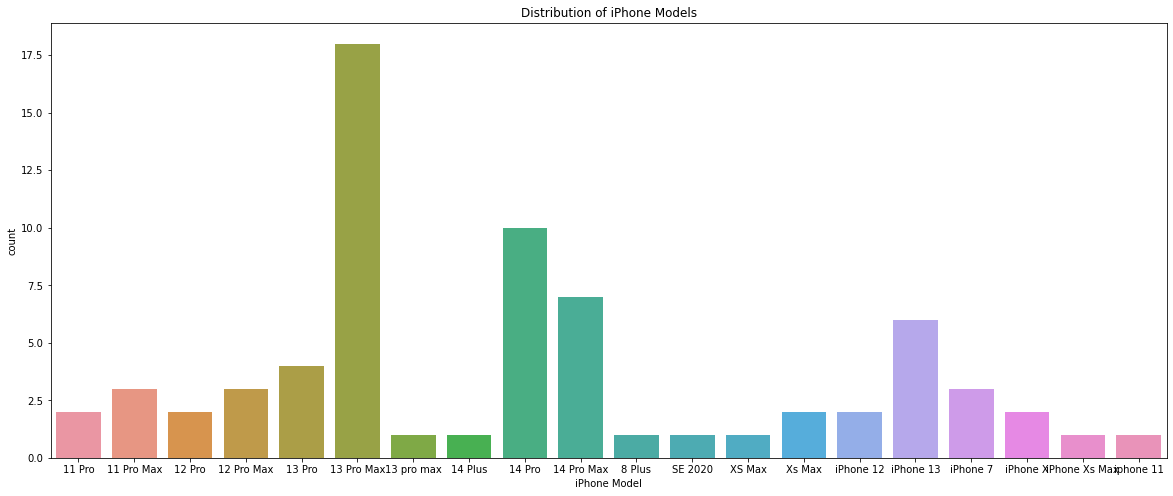

In [12]:
# Create a count plot to visualize the distribution of iPhone models
plt.figure(figsize=(20, 8))
sns.countplot(x='iPhone Model', data=data)
plt.title('Distribution of iPhone Models')
plt.show()

From the distribution counterplot graph we can see the distribution of iPhone models and 13 pro max is higher present in our dataset but few cases on battery health degradation.

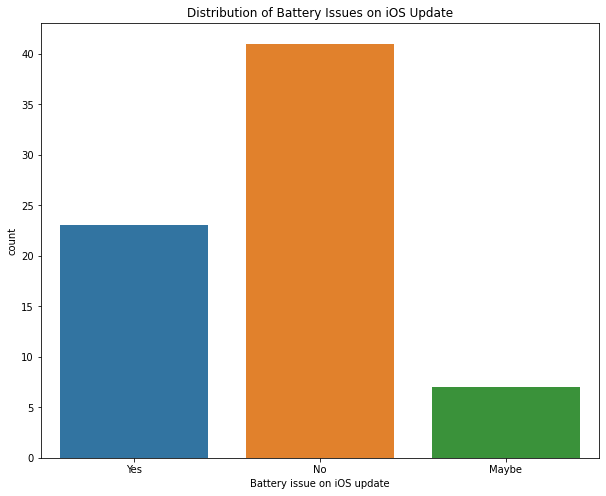

In [13]:
# Create a count plot to visualize the distribution of battery issues on iOS update
plt.figure(figsize=(10, 8))
sns.countplot(x='Battery issue on iOS update', data=data)
plt.title('Distribution of Battery Issues on iOS Update')
plt.show()

In this counterplot we can notice that only 20-25% of users from our survey having battery issues. And if we check into our dataset csv file we can notice that most of them are having previous versions of iPhone and their battery is degrading over iOS updates. 

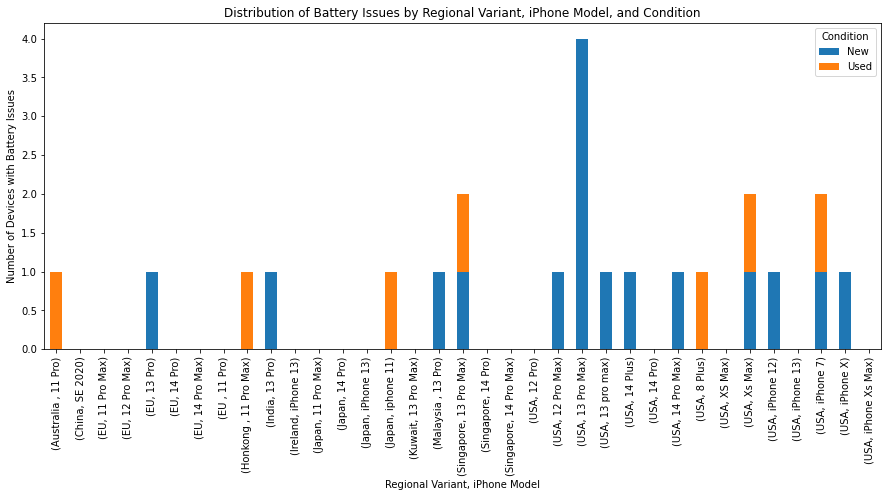

In [14]:


# Create a pivot table with Regional Variant, iPhone Model, and Condition as index, columns, and values
pivot = pd.pivot_table(data, index=['Regional Variant', 'iPhone Model'], columns='Condition', 
                       values='Battery issue on iOS update', aggfunc=lambda x: x.eq('Yes').sum())

# Plot a stacked bar chart
ax = pivot.plot(kind='bar', stacked=True, figsize=(15, 6))
ax.set_title('Distribution of Battery Issues by Regional Variant, iPhone Model, and Condition')
ax.set_xlabel('Regional Variant, iPhone Model')
ax.set_ylabel('Number of Devices with Battery Issues')
plt.show()


#### The above stacked bar chart is showing some important findings to look into. The stacked bar chart depicts the counts of battery issues over the regional variant iphone models based on the conditions. We can see most of the previous version of models having this battery issues and besides iphone 13 pro max on USA variant having significant cases on battery issues. while we checked on the dataset we noticed a data pattern of their charging percentage ratio is almost 90-100% frequently, besides the users might have been a rough users of these devices or some high graphics applications might be installed and used which leds to these significant cases. Morever iPhone's battery is Lithium Ion which is a chemical component battery and gradually it will degrage over time which is normal. It depends how quickly the battery will degrade over the usage of the phone.

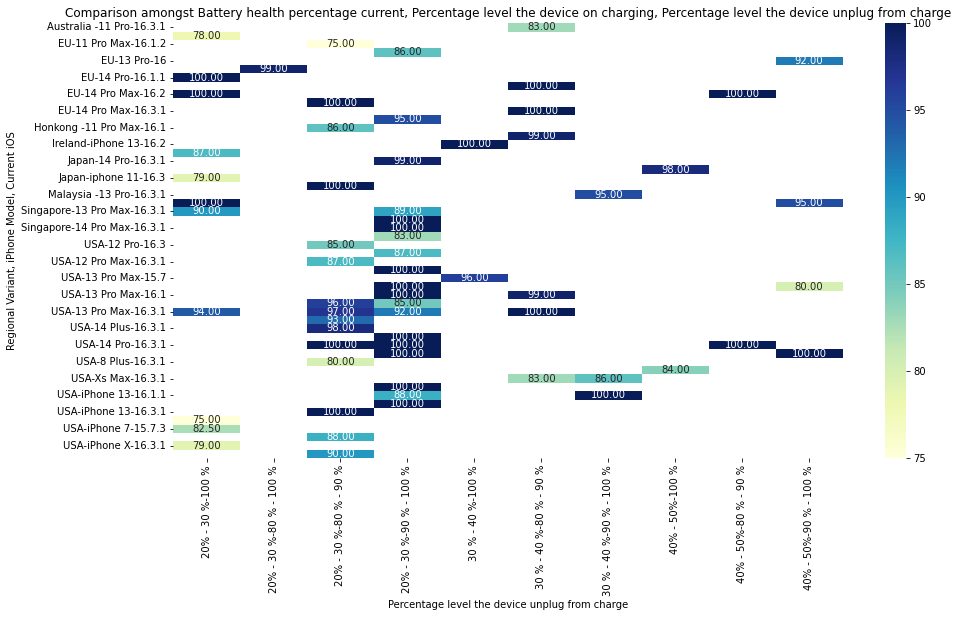

In [15]:


# Create a pivot table with Regional Variant, iPhone Model, and Condition as index, columns, and values
pivot = pd.pivot_table(data, index=['Regional Variant', 'iPhone Model', 'Current iOS'], columns=['Percentage level the device on charging', 'Percentage level the device unplug from charge'], 
                       values='Battery health percentage current', aggfunc='mean')

# Plot a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Comparison amongst Battery health percentage current, Percentage level the device on charging, Percentage level the device unplug from charge')
plt.xlabel('Percentage level the device unplug from charge')
plt.ylabel('Regional Variant, iPhone Model, Current iOS')
plt.show()




#### The above heatmap shows important findings on the battery charging pattern range of the users which probably seems to have some effects on the battery health. the heatmap is the Comparison amongst Battery health percentage current, Percentage level the device on charging, Percentage level the device unplug from charge. we can notice that those who maintain the chsrging pattern range in between 20-30% & 80-90% or 90-100% , tends to have a sufficient battery health percentages. Furthermore it is suggested that it is best practice to follow these charging patterns to longer battery health presrvation.

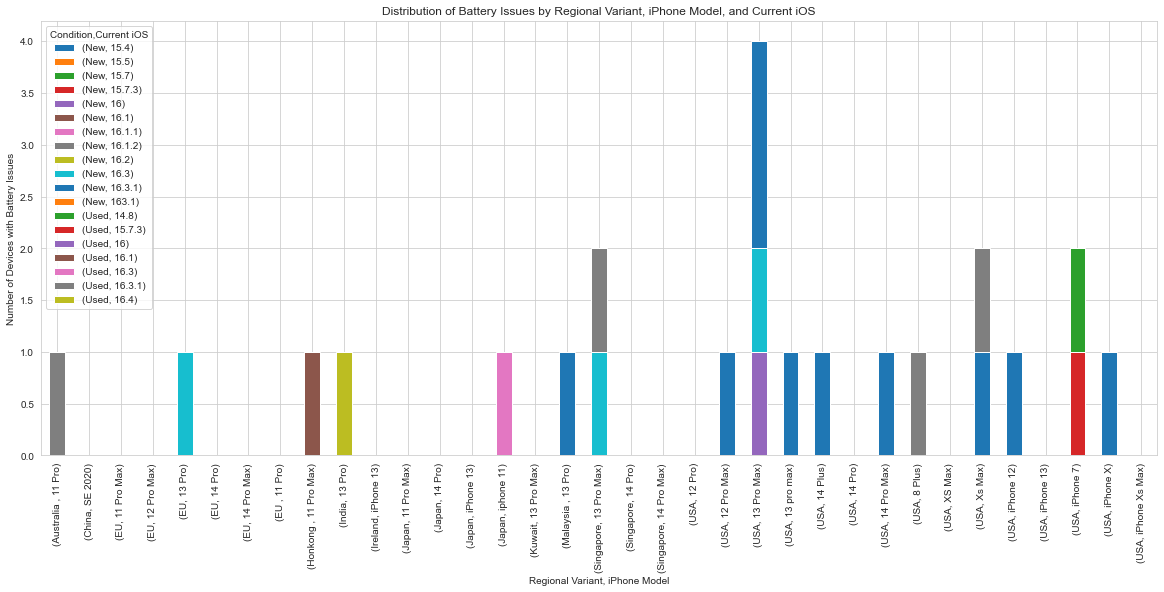

In [16]:
import seaborn as sns

pivot = pd.pivot_table(data, index=['Regional Variant', 'iPhone Model'], columns=['Condition', 'Current iOS'], 
                       values='Battery issue on iOS update', aggfunc=lambda x: x.eq('Yes').sum())


sns.set_style('whitegrid')
ax = pivot.plot(kind='bar', stacked=True, figsize=(20, 8))
ax.set_title('Distribution of Battery Issues by Regional Variant, iPhone Model, and Current iOS')
ax.set_xlabel('Regional Variant, iPhone Model')
ax.set_ylabel('Number of Devices with Battery Issues')
plt.show()



This stack bar chart shows the distribution of battery issues over the regional variant, model and current iOS based on the condition of the devices. 13 pro max on USA variant has some cases on the battery issues. And here the groups are classified based on the conditions. Though some new conditioned devices of 13 pro max having the battery issues but as we previously pointed out it is not that much degraded only some few percentages which is pretty normal over the time. Lithium Ion battery tends to degradge overtime which is normal since it a chemical reaction based battery which is decaying over time period. Now here the thing to be noticed from here that the previous version of devices and the condition of the devices lay greater impact on battery degradation.

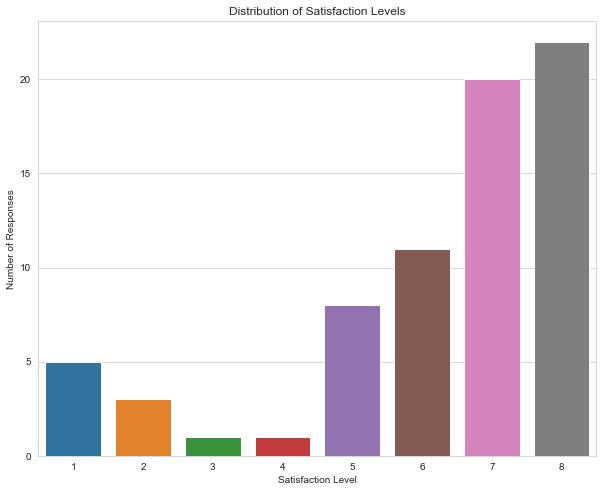

In [17]:
# Create a countplot of the "Are you Satisfied with your device so far?" column
plt.figure(figsize=(10, 8))
sns.countplot(x='Are you Satisfied with your device so far?', data=data)
plt.title('Distribution of Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Responses')
plt.show()



This counterplot shows that most of the users are very satisfied with their apple devices.

## Conclusion:

Based on our analysis, it is evident that the battery health of iPhones is degrading over time, especially in previous versions of models, and over iOS updates. The degradation is more noticeable in devices from the USA and Japan regions.

Charging patterns also have an impact on battery health, and users who maintain a charging pattern range between 20-30%, 80-90%, or 90-100% tend to have better battery health. It is recommended that users follow these charging patterns to preserve battery health.

The condition of the device also plays a significant role in battery degradation. It is observed that new devices, especially the iPhone 13 Pro Max, have fewer battery issues compared to previous versions.

Therefore, it is important to consider the model, region, charging patterns, and device condition when assessing battery health issues. The findings from our analysis could help iPhone users to take necessary precautions to preserve their device's battery health and also inform manufacturers to focus on improving the battery life of their devices.